0-1
0-1


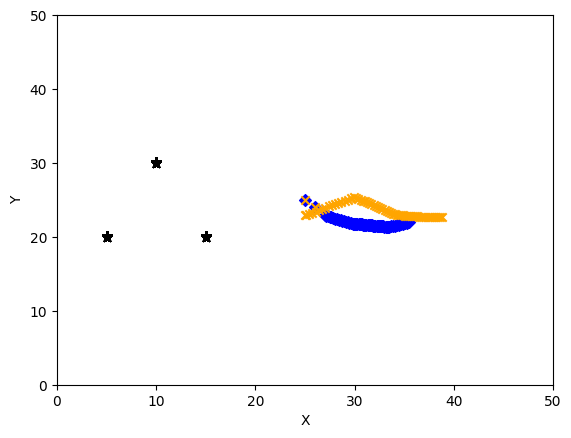

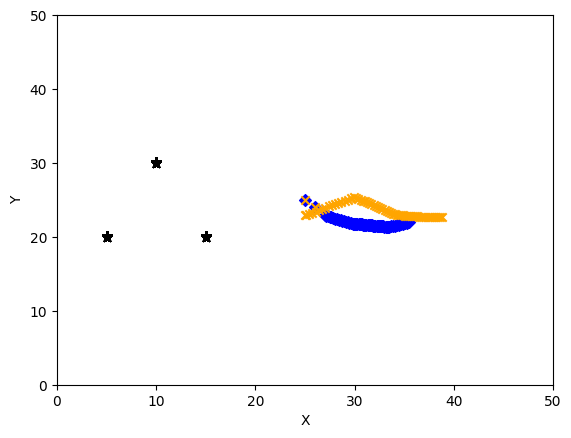

In [8]:

import matplotlib.pyplot as plt
from collections import defaultdict
import csv 
gen = 180
trial = 0
team_size = 2
model = "mlp"
poi_type = "order"
experiment_type = f"{poi_type}_{model}"

for team in range(0,team_size):

    trial_traj_path = f"/home/magraz/rovers/pyrover_domain/experiments/results/trial_{trial}_{experiment_type}/gen_{gen}/eval_team_{team}_joint_traj.csv"
    test_traj_path = f"/home/magraz/rovers/pyrover_domain/experiments/results/hpc/{poi_type}_{model}/gen_{gen}/eval_team_{team}_joint_traj.csv"
    

    traj_path = trial_traj_path

    dd=defaultdict(list)

    with open(traj_path,'r') as csvfile: 
        for line in csv.DictReader(csvfile):
            for key, value in line.items():
                if key != '':
                    if value == 'None':
                        value = 0
                    if isinstance(value, str):
                        if value.find('-') > 0 :
                            dd[key].append(value)
                        else:
                            dd[key].append(float(value))
                    elif isinstance(value, list):
                        dd[key].append([float(x) if x != 'None' else 0 for x in value])

    fig=plt.figure()
    ax=fig.add_subplot(111)

    #PLOT POSITIONS
    print(dd["team_formation"][0])

    colors = ["blue", "orange", "red", "green", "yellow"]
    markers = ["D", "x", "^", "o", "+"]

    team_idxs = [int(x) for x in dd["team_formation"][0].split('-')]

    ax.plot(dd["rover_poi_0_x"], dd["rover_poi_0_y"], marker="*", markersize=8, color="black", zorder=10)
    ax.plot(dd["rover_poi_1_x"], dd["rover_poi_1_y"], marker="*", markersize=8, color="black", zorder=10)
    ax.plot(dd["rover_poi_2_x"], dd["rover_poi_2_y"], marker="*", markersize=8, color="black", zorder=10)
    ax.plot(dd["rover_poi_3_x"], dd["rover_poi_3_y"], marker="*", markersize=8, color="black", zorder=10)
    ax.plot(dd["rover_poi_4_x"], dd["rover_poi_4_y"], marker="*", markersize=8, color="black", zorder=10)
    ax.plot(dd["rover_poi_5_x"], dd["rover_poi_5_y"], marker="*", markersize=8, color="black", zorder=10)
    ax.plot(dd["rover_poi_6_x"], dd["rover_poi_6_y"], marker="*", markersize=8, color="black", zorder=10)
    ax.plot(dd["rover_poi_7_x"], dd["rover_poi_7_y"], marker="*", markersize=8, color="black", zorder=10)
    ax.plot(dd["rover_poi_8_x"], dd["rover_poi_8_y"], marker="*", markersize=8, color="black", zorder=10)

    ax.scatter(dd["rover_0_x"], dd["rover_0_y"], marker=markers[team_idxs[0]], color=colors[team_idxs[0]])
    ax.scatter(dd["rover_1_x"], dd["rover_1_y"], marker=markers[team_idxs[1]], color=colors[team_idxs[1]])
    # ax.scatter(dd["rover_2_x"], dd["rover_2_y"], marker=markers[team_idxs[2]], color=colors[team_idxs[2]])
    # ax.scatter(dd["rover_3_x"], dd["rover_3_y"], marker=markers[team_idxs[3]], color=colors[team_idxs[3]])

    ax.set_xlim(0, 50) 
    ax.set_ylim(0, 50)
    ax.set_xlabel('X') 
    ax.set_ylabel('Y')

#PLOT HEADING

# ax.scatter(dd["rover_1_dx"], dd["rover_1_dy"]) 
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)  
# ax.set_xlabel('dx')
# ax.set_ylabel('dy') 

plt.show() 